In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

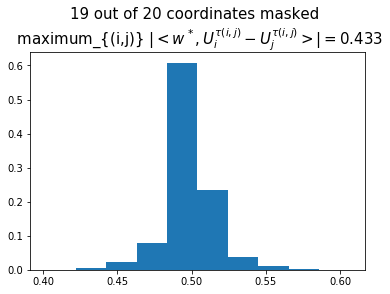

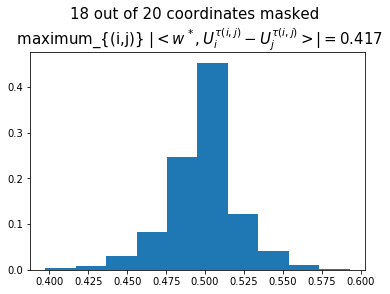

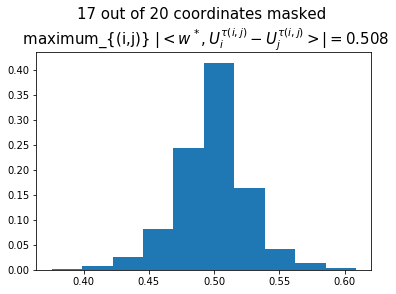

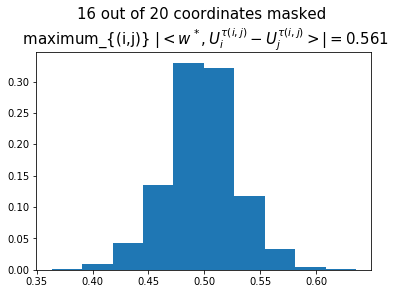

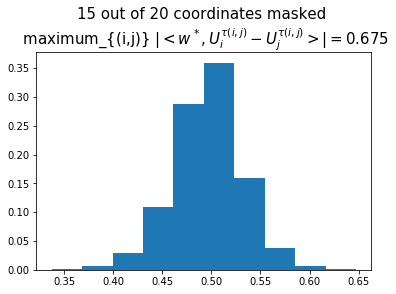

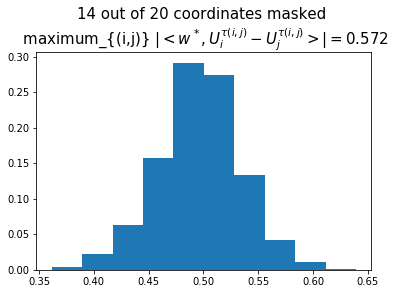

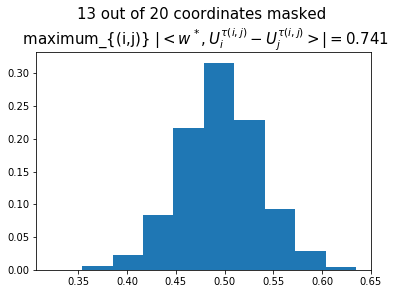

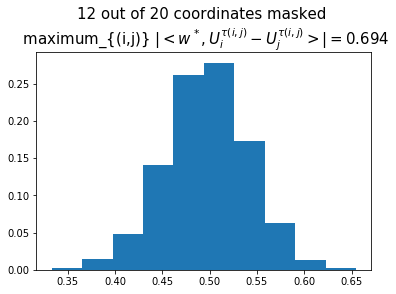

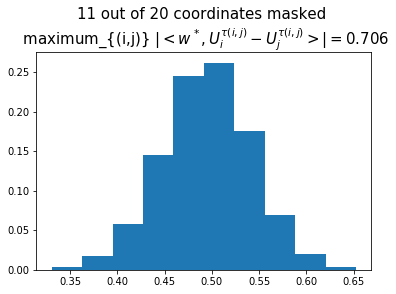

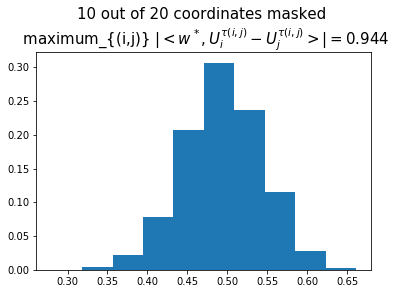

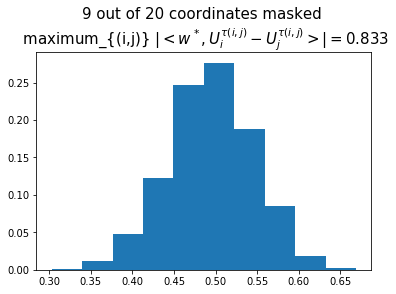

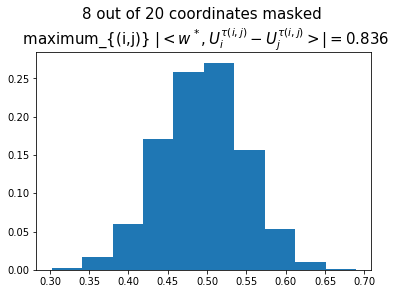

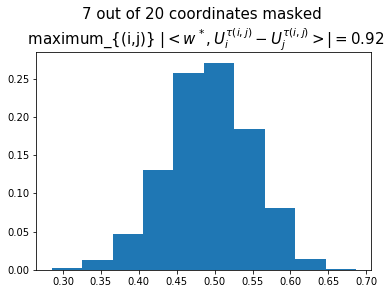

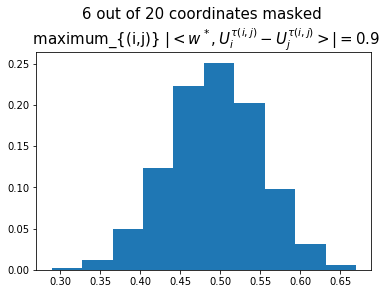

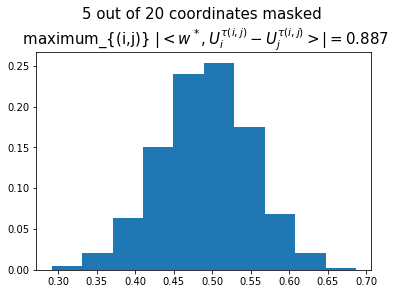

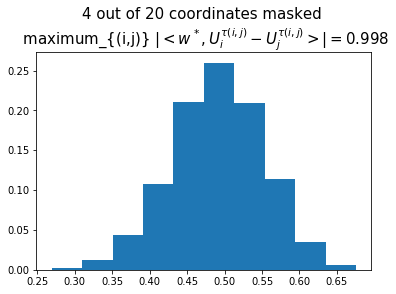

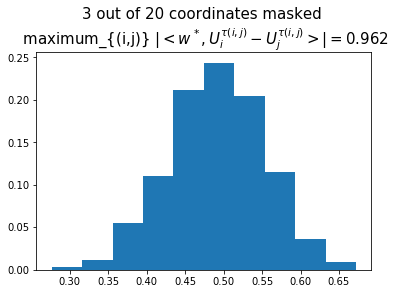

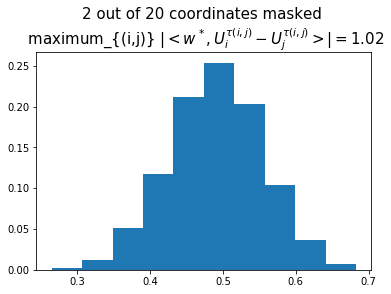

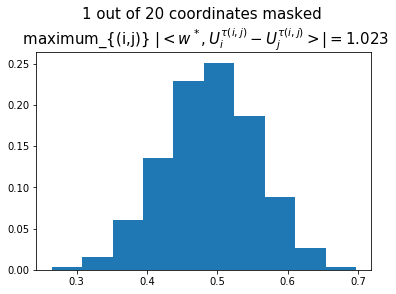

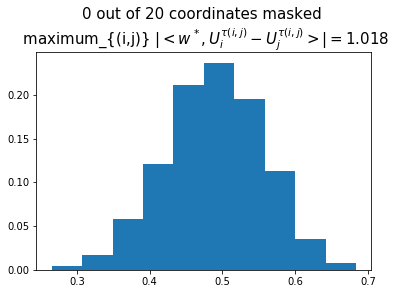

In [28]:
d = 20
n = 100

probs = []
max_vals = []
X = np.random.normal(0, scale=1/np.sqrt(d), size = (d,n))

# w = np.random.randn(d,1)
w = np.random.normal(0, scale=1/np.sqrt(d), size = (d,1))
for k in range(1, d+1):
    temp_probs = []
    max_val = 0
    for i in range(n):
        for j in range(i+1, n):
            Y = X[:,i].reshape(-1,1) - X[:,j].reshape(-1,1)
            idx = np.random.choice(d, d-k, replace = False)
            Y[idx] = 0
            temp = Y.T@w
            temp = temp[0][0]
            if np.abs(temp) > max_val:
                max_val = np.abs(temp)
            temp_probs.append(1 / (1+np.exp(-temp)))
    max_vals.append(max_val)
    probs.append(np.copy(temp_probs))

for i in range(len(probs)):
    weights = np.ones_like(probs[i])/float(len(probs[i]))
    plt.hist(probs[i], weights=weights)
    plt.title(str(d-i-1) + ' out of ' + str(d) + ' coordinates masked \n maximum_{(i,j)} $|< w^*, U_i^{\\tau(i,j)} - U_j^{\\tau(i,j)} >|=$' + str(np.round(max_vals[i],3)), fontsize=15)
    plt.show()

In [20]:
d = 20
n = 100
# X = np.eye(d,d)
X = np.random.normal(0, scale=1/np.sqrt(d), size = (d,n))
w = np.random.normal(0, scale=1/np.sqrt(d), size = (d,1))

results = []
num_exp = 10
for k in range(d+1):
    temp_results = []
    for _ in range(num_exp):
        Z = np.zeros((d,d))
        for i in range(n):
            for j in range(i+1, n):
                Y = X[:,i].reshape(-1,1) - X[:,j].reshape(-1,1)
                idx = np.random.choice(d, d-k, replace = False)
                Y[idx] = 0
                Z += Y@Y.T
        Z = 2/ (n*(n-1))*Z
    #     _, s, _ = np.linalg.svd(X)
    #     print('singular values of X', s)
        e, _ = np.linalg.eig(Z)
        #print('min eigenvalue value of Z is',  np.min(e), 'with k', k)
        temp_results.append(np.min(e))
    results.append(np.copy(temp_results))

In [17]:
results1 = np.copy(results)

In [19]:
results2 = np.copy(results)

In [21]:
def plot_results_side_by_side_new(results1, results2, results3, x, title):
    
    plt.errorbar(x, [np.mean(i) for i in results1], yerr=[stats.sem(i) for i in results1])
    plt.errorbar(x, [np.mean(i) for i in results2], yerr=[stats.sem(i) for i in results2])
    plt.errorbar(x, [np.mean(i) for i in results3], yerr=[stats.sem(i) for i in results3])
    plt.xlabel('number of coordinates that are \n non-zero in each pairwise comparison', fontsize = 15)
    plt.ylabel('lambda', fontsize = 15)
    plt.title(title, fontsize = 15)
    plt.show()

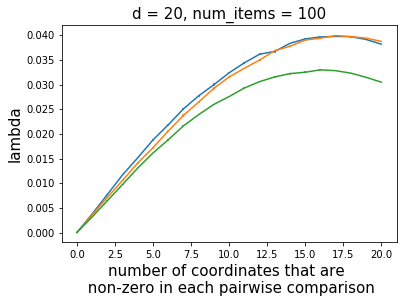

In [25]:
plot_results_side_by_side_new(results1, results2, results, range(0,d+1), 'd = 20, num_items = 100')

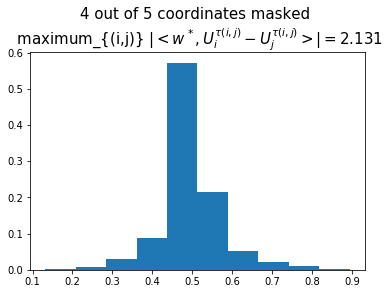

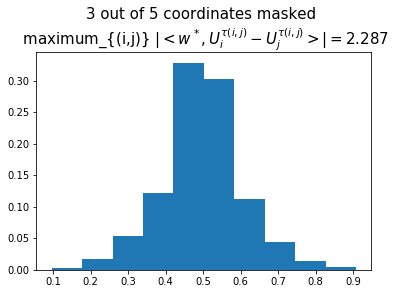

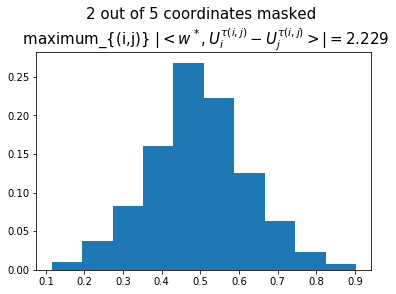

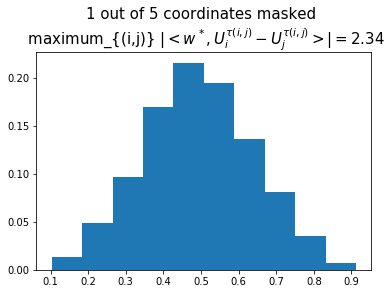

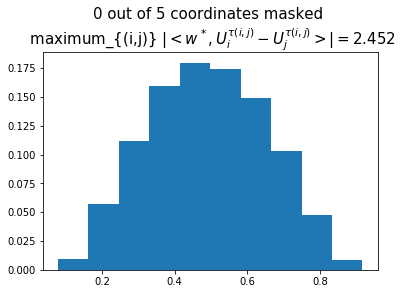

In [29]:
d = 5
n = 100

probs = []
max_vals = []
X = np.random.normal(0, scale=1/np.sqrt(d), size = (d,n))

# w = np.random.randn(d,1)
w = np.random.normal(0, scale=1/np.sqrt(d), size = (d,1))
for k in range(1, d+1):
    temp_probs = []
    max_val = 0
    for i in range(n):
        for j in range(i+1, n):
            Y = X[:,i].reshape(-1,1) - X[:,j].reshape(-1,1)
            idx = np.random.choice(d, d-k, replace = False)
            Y[idx] = 0
            temp = Y.T@w
            temp = temp[0][0]
            if np.abs(temp) > max_val:
                max_val = np.abs(temp)
            temp_probs.append(1 / (1+np.exp(-temp)))
    max_vals.append(max_val)
    probs.append(np.copy(temp_probs))

for i in range(len(probs)):
    weights = np.ones_like(probs[i])/float(len(probs[i]))
    plt.hist(probs[i], weights=weights)
    plt.title(str(d-i-1) + ' out of ' + str(d) + ' coordinates masked \n maximum_{(i,j)} $|< w^*, U_i^{\\tau(i,j)} - U_j^{\\tau(i,j)} >|=$' + str(np.round(max_vals[i],3)), fontsize=15)
    plt.show()

In [34]:
d = 5
n = 100
# X = np.eye(d,d)
X = np.random.normal(0, scale=1/np.sqrt(d), size = (d,n))
w = np.random.normal(0, scale=1/np.sqrt(d), size = (d,1))

results = []
num_exp = 10
for k in range(d+1):
    temp_results = []
    for _ in range(num_exp):
        Z = np.zeros((d,d))
        for i in range(n):
            for j in range(i+1, n):
                Y = X[:,i].reshape(-1,1) - X[:,j].reshape(-1,1)
                idx = np.random.choice(d, d-k, replace = False)
                Y[idx] = 0
                Z += Y@Y.T
        Z = 2/ (n*(n-1))*Z
    #     _, s, _ = np.linalg.svd(X)
    #     print('singular values of X', s)
        e, _ = np.linalg.eig(Z)
        #print('min eigenvalue value of Z is',  np.min(e), 'with k', k)
        temp_results.append(np.min(e))
    results.append(np.copy(temp_results))

In [31]:
results1 = np.copy(results)

In [33]:
results2 = np.copy(results)

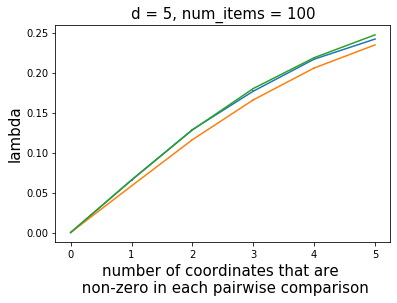

In [36]:
plot_results_side_by_side_new(results1, results2, results, range(0,d+1), 'd = 5, num_items = 100')